In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([[1,2], [3,4],[5,6],[7,8]])

pd.DataFrame(np.percentile(df, [i for i in range(1, 100)], axis=0))

,0,1
0,1.06,2.06
1,1.12,2.12
2,1.18,2.18
3,1.24,2.24
4,1.30,2.30
...,...,...
94,6.70,7.70
95,6.76,7.76
96,6.82,7.82
97,6.88,7.88


In [3]:
free_cands = pd.DataFrame(np.full((50, 2), True))

In [4]:
free_cands.iloc[:4, :] = False
free_cands.iloc[-4:, :] = False

In [5]:
current_free_cands = free_cands.iloc[:, 0]
indexes = current_free_cands[current_free_cands == True].index

In [6]:
from utils import load_parquet_to_df_list, z_normalize

In [7]:
path = "../../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# concatenate time series to one dataframe, because all time series have the same length
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]
df_norm

,signal,signal
0,2.223633,1.879365
1,2.058567,1.733153
2,1.849589,1.579823
3,1.642328,1.402389
4,1.438219,1.257130
...,...,...
123,1.345195,1.162620
124,1.547908,1.314745
125,1.760490,1.500432
126,1.970141,1.657326


In [8]:
input_list = [1, 2, 3, 4, 7, 8, 9]
result = [input_list[:i] for i in range(4-1, 6)]
result

[[1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 7]]

In [33]:
from discretization.persist.persist import do_persist


bins, best_pscores = do_persist(df_norm, 2, 6, 2)

In [34]:
bins

[[-0.8985123095586725, -0.2453159561542242, 0.8655056790804788],
 [-1.65273807006388,
  -0.377780508279819,
  0.11300740422608681,
  0.7856222582237774]]

In [11]:
best_pscores

,0,1
2,0.405574,0.411185
3,0.532495,0.537957
4,0.564225,0.584393
5,0.557189,0.592828
6,0.550412,0.588822


<AxesSubplot: >

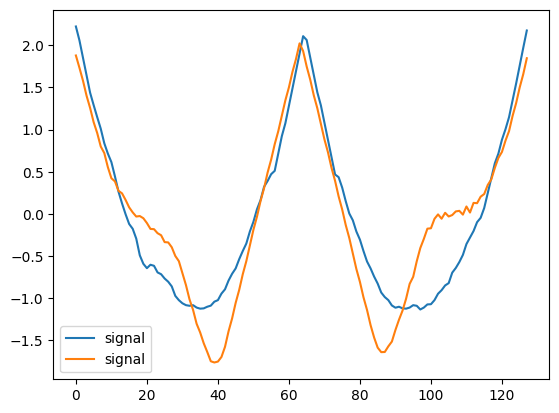

In [12]:
df_norm.plot()